In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('../new_data.csv')

In [5]:
# print (df.head())

In [6]:
y = df['P. Habitable Class'] #label
X = df.drop(['P. Mass Class', 'P. Zone Class', 'P. Composition Class', 'P. Atmosphere Class', 'P. Name'], axis = 1)
X= X.select_dtypes(['number'])
# X is features

In [7]:
 X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [8]:
# print("\nX_train:\n")
# print(X_train.head())
print(X_train.shape)
print(X_test.shape)

(3100, 51)
(775, 51)


In [9]:
from sklearn import metrics
k_range = range(3,16)
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_results = knn.fit(X_train,y_train)
    y_pred = knn_results.predict(X_test)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    
print(scores_list)

[0.9819354838709677, 0.9793548387096774, 0.9793548387096774, 0.9819354838709677, 0.9806451612903225, 0.9819354838709677, 0.9806451612903225, 0.9806451612903225, 0.9806451612903225, 0.9806451612903225, 0.9819354838709677, 0.984516129032258, 0.984516129032258]


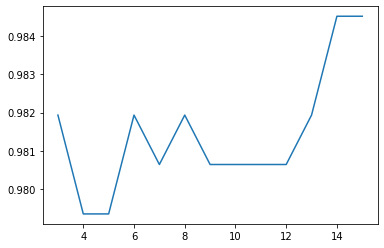

In [10]:
plt.plot(k_range, scores_list)

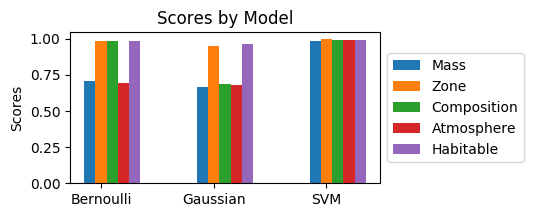

In [35]:
import numpy as np
from matplotlib.pyplot import figure

figure(num=None, figsize=(4, 2), dpi=100, facecolor='w', edgecolor='k')
MassClass = [0.71, 0.6645, 0.9832]
ZoneClass = [0.9863, 0.9496,0.9942]
ComClass = [0.9845, 0.6864, 0.9896]
AtmClass = [0.6954, 0.6761, 0.9935]
HabitClass = [0.9832, 0.9651, 0.9935]
N = 3
ind = np.arange(N) 
width = 0.10       
plt.bar(ind, MassClass, width, label='Mass')
plt.bar(ind + width, ZoneClass, width,
    label='Zone')
plt.bar(ind + 2*width, ComClass, width,
    label='Composition')
plt.bar(ind + 3*width, AtmClass, width,
    label='Atmosphere')
plt.bar(ind + 4*width, HabitClass, width,
    label='Habitable')
plt.ylabel('Scores')
plt.title('Scores by Model')

plt.xticks(ind + width, ('Bernoulli', 'Gaussian', 'SVM'))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()